# Build binary classification models where some use RFE selected features

In [114]:
import model.load_data as ld
import scoring_metrics as sm

from sklearn import metrics
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson
from sklearn.svm import SVC 
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
xgb.set_config(verbosity=0)
import matplotlib
from sklearn.model_selection import train_test_split 
pd.set_option('display.max_columns', None)
import sys
np.set_printoptions(threshold=sys.maxsize)

import importlib
importlib.reload(sm)


<module 'scoring_metrics' from 'c:\\Users\\marti\\Desktop\\TU Delft\\Q2\\Seminar Social Signal Processing\\code\\our code\\social-signal-processing-project\\source\\scoring_metrics.py'>

In [115]:
datasets = """Bed002 Bed003 Bed004 Bed005 Bed006 Bed008 Bed009 Bed010 Bed011 Bed012 Bed013 Bed014 Bed015 Bed016 Bed017 Bmr001 Bmr002 Bmr005 Bmr007 Bmr009 Bmr010 Bmr011 Bmr012 Bmr013 Bmr014 Bmr018 Bmr019 Bmr021 Bmr022 Bmr024 Bmr025 Bmr026 Bmr027 Bmr029 Bns001 Bns002""".split(" ")
results_merged_path = "../results_merged_fixedf0/"

X_train_20, y_train_20, X_test_20, y_test_20 = ld.train_test_split(datasets,results_merged_path,0.2)
X_train_40, y_train_40, X_test_40, y_test_40 = ld.train_test_split(datasets,results_merged_path,0.4)

def filter(data):
    data['similarity'] = data['similarity'].str[2:-2]
    data['similarity'] = pd.to_numeric(data['similarity'])
    data = data[['pause','speakerChange','similarity']]
    
    return data

X_train_20 = filter(X_train_20)
X_test_20 = filter(X_test_20)
X_train_40 = filter(X_train_40)
X_test_40 = filter(X_test_40)

k = 53

## Test on commonly used models

### XGB Classifier for binary class

In [116]:
def XGB_class(X_train, X_test, y_train, y_test):
    
    clf = xgb.XGBClassifier(seed = 24, use_label_encoder =False)
    clf.fit(X_train, y_train)
    y_predicted = clf.predict(X_test)
    
    return clf.predict_proba(X_test)[:,1]

In [117]:
XGBc_y_predicted_20 = XGB_class(X_train_20,X_test_20,y_train_20,y_test_20)
print('--------Using 20% as test subset:')
print('- windiff:',sm.get_windiff(np.array(XGBc_y_predicted_20),np.array(y_test_20),k))
print('- pk:',sm.get_pk(np.array(XGBc_y_predicted_20),np.array(y_test_20),k))

XGBc_y_predicted_40 = XGB_class(X_train_40,X_test_40,y_train_40,y_test_40)
print('--------Using 40% as test subset:')
print('- windiff:',sm.get_windiff(np.array(XGBc_y_predicted_40),np.array(y_test_40),k))
print('- pk:',sm.get_pk(np.array(XGBc_y_predicted_40),np.array(y_test_40),k))


C:\Users\marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


--------Using 20% as test subset:
- windiff: 0.37054559328500575
- pk: 0.21590766002098635
--------Using 40% as test subset:
- windiff: 0.30194019442963205
- pk: 0.17826499277456648


### SVM for binary class

In [118]:
def SVMc(X_train,X_test,y_train,y_test):
    clf = SVC(kernel='linear',probability=True) 
    clf.fit(X_train, y_train) 
    preds = clf.predict(X_test)
    sSVM_y_predicted = clf.predict_proba(X_test)[:,1]
    
    return sSVM_y_predicted

In [128]:
SVM_y_predicted_20 = SVMc(X_train_20,X_test_20,y_train_20,y_test_20)
print('--------Using 20% as test subset:')
print('- windiff:',sm.get_windiff(np.array(SVM_y_predicted_20),np.array(y_test_20),k))
print('- pk:',sm.get_pk(np.array(SVM_y_predicted_20),np.array(y_test_20),k))

SVM_y_predicted_40 = SVMc(X_train_40,X_test_40,y_train_40,y_test_40)
print('--------Using 40% as test subset:')
print('- windiff:',sm.get_windiff(np.array(SVM_y_predicted_40),np.array(y_test_40),k))
print('- pk:',sm.get_pk(np.array(SVM_y_predicted_40),np.array(y_test_40),k))

--------Using 20% as test subset:
- windiff: 0.42800457840518885
- pk: 0.2606925498426023
--------Using 40% as test subset:
- windiff: 0.3256491242462775
- pk: 0.19781882225433525


### Random Forest classifier for binary class

In [120]:
def RFc(X_train,X_test,y_train,y_test):
    model = RandomForestClassifier().fit(X_train,y_train)
    preds = model.predict(X_test)
    sRFC_y_predicted = model.predict_proba(X_test)[:,1]
    
    return sRFC_y_predicted

In [121]:
RFc_y_predicted_20 = RFc(X_train_20,X_test_20,y_train_20,y_test_20)
print('Using 20% as test subset:')
print('- windiff:',sm.get_windiff(np.array(RFc_y_predicted_20),np.array(y_test_20),k))
print('- pk:',sm.get_pk(np.array(RFc_y_predicted_20),np.array(y_test_20),k))

RFc_y_predicted_40 = RFc(X_train_40,X_test_40,y_train_40,y_test_40)
print('Using 40% as test subset:')
print('- windiff:',sm.get_windiff(np.array(RFc_y_predicted_40),np.array(y_test_40),k))
print('- pk:',sm.get_pk(np.array(RFc_y_predicted_40),np.array(y_test_40),k))

Using 20% as test subset:
- windiff: 0.03235406333460511
- pk: 0.017796432318992656
Using 40% as test subset:
- windiff: 0.019566019935190124
- pk: 0.010070447976878612


### Logistic Regressor for binary class

In [122]:
def LR(X_train,X_test,y_train,y_test):
    model = LogisticRegression(random_state=0).fit(X_train,y_train)
    preds = model.predict(X_test)
    sLR_y_predicted = model.predict_proba(X_test)[:,1]
    
    return sLR_y_predicted

In [127]:
LR_y_predicted_20 = LR(X_train_20,X_test_20,y_train_20,y_test_20)
print('Using 20% as test subset:')
print('- windiff:',sm.get_windiff(np.array(LR_y_predicted_20),np.array(y_test_20),k))
print('- pk:',sm.get_pk(np.array(LR_y_predicted_20),np.array(y_test_20),k))

LR_y_predicted_40 = LR(X_train_40,X_test_40,y_train_40,y_test_40)
print('Using 40% as test subset:')
print('- windiff:',sm.get_windiff(np.array(LR_y_predicted_40),np.array(y_test_40),k))
print('- pk:',sm.get_pk(np.array(LR_y_predicted_40),np.array(y_test_40),k))

Using 20% as test subset:
- windiff: 0.4291491797024037
- pk: 0.2629171038824764
Using 40% as test subset:
- windiff: 0.32355715985069117
- pk: 0.19671242774566475


### Plot AUC-ROC Curve

In [124]:
def roc(y_tests,y_predicted,models_name,title):  
    if len(y_predicted)>2:  
        #there are 4 diff colors in max
        colors = ["red", "blue", "green", "orange"]
            
        for i in range(int(len(y_predicted)/2)):
            fpr, tpr, _ = metrics.roc_curve(y_tests[i],  y_predicted[i])
            #create ROC curve
            plt.plot(fpr, tpr, linestyle='-',color=colors[i])

        counter=0
        for i in range(int(len(y_predicted)/2),int(len(y_predicted))):
            fpr, tpr, _ = metrics.roc_curve(y_tests[i],  y_predicted[i])
            #create ROC curve
            plt.plot(fpr, tpr, linestyle='--',color=colors[counter])
            counter+=1
    
    else:
        for i in range(int(len(y_predicted))):
            fpr, tpr, _ = metrics.roc_curve(y_tests[i],  y_predicted[i])
            #create ROC curve
            plt.plot(fpr, tpr, linestyle='-')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.legend(models_name)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title(title)
    plt.show()

C:\Users\marti\AppData\Local\Temp\ipykernel_19248\1674596823.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_tests = np.array([y_test_20,y_test_20,y_test_20,y_test_40,y_test_40,y_test_40])
C:\Users\marti\AppData\Local\Temp\ipykernel_19248\1674596823.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_preds = np.array([XGBc_y_predicted_20,RFc_y_predicted_20,LR_y_predicted_20,XGBc_y_predicted_40,RFc_y_predicted_40,LR_y_predicted_40])


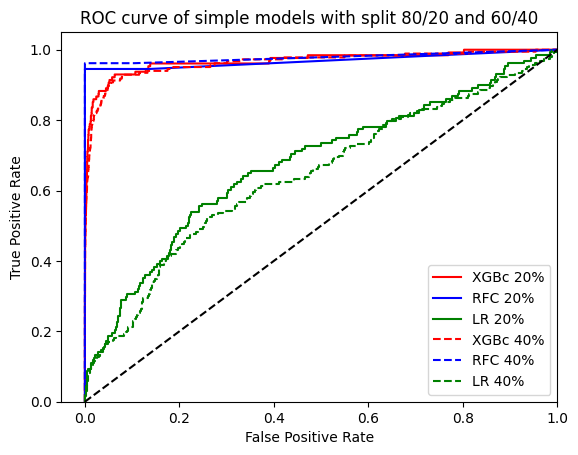

In [125]:
y_tests = np.array([y_test_20,y_test_20,y_test_20,y_test_40,y_test_40,y_test_40])
y_preds = np.array([XGBc_y_predicted_20,RFc_y_predicted_20,LR_y_predicted_20,XGBc_y_predicted_40,RFc_y_predicted_40,LR_y_predicted_40])
models_name=np.array(['XGBc 20%','RFC 20%','LR 20%','XGBc 40%','RFC 40%','LR 40%'])
title = 'ROC curve of simple models with split 80/20 and 60/40'
roc(y_tests,y_preds,models_name,title)

In [126]:
# # First part is merging all meetings
# datasets = "Bed002 Bed003 Bed004 Bed005 Bed006 Bed008 Bed009 Bed010 Bed011 Bed012 Bed013 Bed014 Bed015 Bed016 Bed017 Bmr001 Bmr002 Bmr005 Bmr007 Bmr009 Bmr010 Bmr011 Bmr012 Bmr013 Bmr014 Bmr018 Bmr019 Bmr021 Bmr022 Bmr024 Bmr025 Bmr026 Bmr027 Bmr029 Bns001 Bns002".split(" ")
# meetings_to_test = "Bed002".split(" ")
# results_merged_path = "../results_merged/"

# all_df = pd.DataFrame()
# for elem in meetings_to_test:
#     path = (os.path.realpath(os.path.join(os.getcwd(), (f"{results_merged_path}"+ elem + ".csv"))))
#     df = pd.read_csv(path, sep=';')
#     all_df = pd.concat([all_df,df], ignore_index=True)
    
# #change boolean to 1 or 0
# all_df['speakerChange'] = all_df["speakerChange"].astype(float)
# all_df['boundary'] = all_df["boundary"].astype(float)

# #replace nan by zero
# all_df.fillna(0,inplace=True)

# #keep only useful columns (can't use f0_means, f0_stds, and similarity yet as they are lists)
# #test using the same amount of rows with boundary==1 and ==0
# # nbr_1 = len(all_df.loc[all_df['boundary']==1])
# # df_0 = all_df.loc[all_df['boundary']==0].head(nbr_1)
# # df_1 = all_df.loc[all_df['boundary']==1]
# # df_balanced = pd.concat([df_0,df_1], ignore_index=True)
# # df_balanced.reset_index(drop=True,inplace=True)
# # X_df = df_balanced[['StartTimeA','EndTimeA','StartTimeB','EndTimeB','pause','speakerChange']]
# # y_df = df_balanced['boundary']

# #normal split (but WARNING!!! NBR OF BOUNDARY == 1 IS VERYYYY LOW)
# X_df = all_df[['StartTimeA','EndTimeA','StartTimeB','EndTimeB','pause','speakerChange']]
# y_df = all_df['boundary']

# #check dataset statistics
# print(y_df.describe())
# print(X_df.corrwith(y_df))

# #split dataset
# X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(X_df, y_df, test_size = 0.20, random_state = 97,stratify=y_df)
# X_train_40, X_test_40, y_train_40, y_test_40 = train_test_split(X_df, y_df, test_size = 0.40, random_state = 97,stratify=y_df)